# Business Objective

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. The data consists of prepaid users from the southeast asian countries and India only. 

## Imports

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.inf)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Read Data

In [2]:
#url = 'https://raw.githubusercontent.com/u-prashant/telecom_churn/master/telecom_churn_data.csv'
url = 'telecom_churn_data.csv'
telecom_churn_df = df2 = pd.read_csv(url)
telecom_churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
telecom_churn_df.shape

(99999, 226)

In [4]:
telecom_churn_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
telecom_churn_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6                960

In [6]:
## NOTE - finding numerical and categorical columns just on the basis of numeric dtypes may be wrong.
## For eg :- columns like fb_user, night_pack etc are categorical columns but will be considered as numeric. 

# Finding numerical data
numeric_data = telecom_churn_df.select_dtypes(include = [np.number])

# Finding categorical data
categorical_data = telecom_churn_df.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features'.format(numeric_data.shape[1], categorical_data.shape[1]))
print('Categorical features', categorical_data.columns)
print('Numerical features', numeric_data.columns.values.tolist())

There are 214 numerical and 12 categorical features
Categorical features Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')
Numerical features ['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_

# DATA PREPARATION

## 1. Labelling Churn 

### Churn Definition
For this assignment, churn has been defined on the basis of 
1. **Usage-based churn**: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.
2. **High-value customers**: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [7]:
telecom_churn_df['total_rech_data_6'] = telecom_churn_df['total_rech_data_6'] * telecom_churn_df['av_rech_amt_data_6']
telecom_churn_df['total_rech_data_7'] = telecom_churn_df['total_rech_data_7'] * telecom_churn_df['av_rech_amt_data_7']

telecom_churn_df['amt_data_6'] = telecom_churn_df[['total_rech_amt_6','total_rech_data_6']].sum(axis=1)
telecom_churn_df['amt_data_7'] = telecom_churn_df[['total_rech_amt_7','total_rech_data_7']].sum(axis=1)

telecom_churn_df['avg_amt_data_6_7'] = telecom_churn_df[['amt_data_6','amt_data_7']].mean(axis=1)

In [8]:
# As per the definition of high value customers are those whose recharge amount 
# should be more than or equal to 70th percentile.
telecom_churn_df = telecom_churn_df[(telecom_churn_df['avg_amt_data_6_7']> telecom_churn_df['avg_amt_data_6_7'].quantile(0.7))]
telecom_churn_df.shape

(29953, 229)

In [9]:
# Labelling churn customers on the basis of definition defined above
telecom_churn_df['churn'] = np.where(((telecom_churn_df['total_ic_mou_9'] == 0.00) | 
                             (telecom_churn_df['total_og_mou_9'] == 0.00)) & 
                            ((telecom_churn_df['vol_2g_mb_9'] == 0.00) | 
                             (telecom_churn_df['vol_3g_mb_9'] == 0.00))
                            , 1, 0
                           )

In [10]:
telecom_churn_df['churn'].value_counts() / telecom_churn_df.shape[0]

0    0.89133
1    0.10867
Name: churn, dtype: float64

**Observations**
1. Approximately 10% of the customers were labelled as churn and 90% as non-churn.

## 2. Cleaning Data 


#### Remove all the attributes corresponding to the churn phase 

(all attributes having ‘ _9’, etc. in their names have to be dropped as it is a churn phase).

In [11]:
telecom_churn_df.drop(telecom_churn_df.filter(regex='_9|sep', axis=1).columns, axis=1, inplace=True)
telecom_churn_df.shape

(29953, 175)

#### Dropping all features that contains only 1 unique value as they won't help in prediction

In [12]:
unique_stats = pd.DataFrame(telecom_churn_df.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(unique_stats[unique_stats['nunique'] == 1])

print('%d features with a single unique value.\n' % len(unique_stats[unique_stats['nunique'] == 1]))
telecom_churn_df.drop(columns = list(unique_stats[unique_stats['nunique'] == 1]['feature']), inplace=True)
telecom_churn_df.shape

                 feature  nunique
1              circle_id        1
2         loc_og_t2o_mou        1
3         std_og_t2o_mou        1
4         loc_ic_t2o_mou        1
5   last_date_of_month_6        1
6   last_date_of_month_7        1
7   last_date_of_month_8        1
47      std_og_t2c_mou_6        1
48      std_og_t2c_mou_7        1
49      std_og_t2c_mou_8        1
86      std_ic_t2o_mou_6        1
87      std_ic_t2o_mou_7        1
88      std_ic_t2o_mou_8        1
13 features with a single unique value.



(29953, 162)

#### Dropping mobile number as it is an unique identifier and doesn't help in prediction

In [13]:
telecom_churn_df.drop(columns='mobile_number', inplace=True)

In [14]:
telecom_churn_df.shape

(29953, 161)

### 3. Missing Value Treatment

In [15]:
# Let's have a look at missing values - how many are there & also get their percencentages
pd.options.display.float_format = '{:.2f}'.format
missing_values = pd.DataFrame((telecom_churn_df.isnull().sum()/len(telecom_churn_df))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values

,feature,Missing%
119,count_rech_3g_8,46.80
110,total_rech_data_8,46.80
152,fb_user_8,46.80
131,arpu_3g_8,46.80
122,av_rech_amt_data_8,46.80
116,count_rech_2g_8,46.80
134,arpu_2g_8,46.80
137,night_pck_user_8,46.80
113,max_rech_data_8,46.80
107,date_of_last_rech_data_8,46.80


**arpu_3g_8 related fields imputation**

In [16]:
telecom_churn_df[telecom_churn_df['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                            'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                            'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
                            'fb_user_8'
                           ]].nunique()

date_of_last_rech_data_8    0
total_rech_data_8           0
max_rech_data_8             0
count_rech_2g_8             0
count_rech_3g_8             0
av_rech_amt_data_8          0
vol_2g_mb_8                 1
vol_3g_mb_8                 1
arpu_2g_8                   0
night_pck_user_8            0
monthly_2g_8                1
sachet_2g_8                 1
monthly_3g_8                1
sachet_3g_8                 1
fb_user_8                   0
dtype: int64

In [17]:
telecom_churn_df[telecom_churn_df['arpu_3g_8'].isna()][['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                            'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                            'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
                            'fb_user_8'
                           ]].head()

,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_8,count_rech_2g_8,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_8,vol_3g_mb_8,arpu_2g_8,night_pck_user_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,fb_user_8
7,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
21,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
38,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
41,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan
48,NaN,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,0,0,0,0,nan


In [18]:
telecom_churn_df['arpu_3g_8'].fillna(0,inplace=True)

**Imputation of 6th month related fields**

In [19]:
telecom_churn_df.filter(regex='_6|sep', axis=1).info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 53 columns):
arpu_6                      29953 non-null float64
onnet_mou_6                 29411 non-null float64
offnet_mou_6                29411 non-null float64
roam_ic_mou_6               29411 non-null float64
roam_og_mou_6               29411 non-null float64
loc_og_t2t_mou_6            29411 non-null float64
loc_og_t2m_mou_6            29411 non-null float64
loc_og_t2f_mou_6            29411 non-null float64
loc_og_t2c_mou_6            29411 non-null float64
loc_og_mou_6                29411 non-null float64
std_og_t2t_mou_6            29411 non-null float64
std_og_t2m_mou_6            29411 non-null float64
std_og_t2f_mou_6            29411 non-null float64
std_og_mou_6                29411 non-null float64
isd_og_mou_6                29411 non-null float64
spl_og_mou_6                29411 non-null float64
og_others_6                 29411 non-null float64
total_og_mou_6          

In [20]:
mou_6 = telecom_churn_df.filter(regex='mou_6|sep', axis=1)
mou_6_col = mou_6.columns

In [21]:
telecom_churn_df[telecom_churn_df['onnet_mou_6'].isna()][mou_6_col].head()

,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,...,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan
77,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan
364,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan
414,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan
423,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan


**Observations**

onnet and other mou_6 value are missing for the same rows which means that the customer minutes of usage was 0 and hence can be safely imputed with 0.

In [22]:
telecom_churn_df[mou_6_col] = telecom_churn_df[mou_6_col].fillna(0)
telecom_churn_df[mou_6_col].isna().sum()

onnet_mou_6         0
offnet_mou_6        0
roam_ic_mou_6       0
roam_og_mou_6       0
loc_og_t2t_mou_6    0
loc_og_t2m_mou_6    0
loc_og_t2f_mou_6    0
loc_og_t2c_mou_6    0
loc_og_mou_6        0
std_og_t2t_mou_6    0
std_og_t2m_mou_6    0
std_og_t2f_mou_6    0
std_og_mou_6        0
isd_og_mou_6        0
spl_og_mou_6        0
total_og_mou_6      0
loc_ic_t2t_mou_6    0
loc_ic_t2m_mou_6    0
loc_ic_t2f_mou_6    0
loc_ic_mou_6        0
std_ic_t2t_mou_6    0
std_ic_t2m_mou_6    0
std_ic_t2f_mou_6    0
std_ic_mou_6        0
total_ic_mou_6      0
spl_ic_mou_6        0
isd_ic_mou_6        0
dtype: int64

**Imputation of 7th month related fields**

In [23]:
telecom_churn_df.filter(regex='_7|sep', axis=1).info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 53 columns):
arpu_7                      29953 non-null float64
onnet_mou_7                 29417 non-null float64
offnet_mou_7                29417 non-null float64
roam_ic_mou_7               29417 non-null float64
roam_og_mou_7               29417 non-null float64
loc_og_t2t_mou_7            29417 non-null float64
loc_og_t2m_mou_7            29417 non-null float64
loc_og_t2f_mou_7            29417 non-null float64
loc_og_t2c_mou_7            29417 non-null float64
loc_og_mou_7                29417 non-null float64
std_og_t2t_mou_7            29417 non-null float64
std_og_t2m_mou_7            29417 non-null float64
std_og_t2f_mou_7            29417 non-null float64
std_og_mou_7                29417 non-null float64
isd_og_mou_7                29417 non-null float64
spl_og_mou_7                29417 non-null float64
og_others_7                 29417 non-null float64
total_og_mou_7          

In [24]:
mou_7 = telecom_churn_df.filter(regex='mou_7|sep', axis=1)
mou_7_col = mou_6.columns

In [25]:
telecom_churn_df[telecom_churn_df['onnet_mou_7'].isna()][mou_6_col].head()

,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,...,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
539,199.04,132.31,0.00,0.00,187.93,85.06,1.73,0.00,274.73,11.11,...,45.86,1.73,65.84,13.13,75.89,0.00,89.03,154.88,0.00,0.00
687,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1138,26.81,519.28,7.01,0.00,18.68,23.53,0.00,0.00,42.21,8.13,...,56.63,0.00,72.33,4.03,119.04,0.00,123.08,195.71,0.30,0.00
1489,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


**Observations**

onnet and other mou_7 value are missing for the same rows which means that the customer minutes of usage was 0 and hence can be safely imputed with 0.

In [26]:
telecom_churn_df[mou_7_col] = telecom_churn_df[mou_7_col].fillna(0)
telecom_churn_df[mou_7_col].isna().sum()

onnet_mou_6         0
offnet_mou_6        0
roam_ic_mou_6       0
roam_og_mou_6       0
loc_og_t2t_mou_6    0
loc_og_t2m_mou_6    0
loc_og_t2f_mou_6    0
loc_og_t2c_mou_6    0
loc_og_mou_6        0
std_og_t2t_mou_6    0
std_og_t2m_mou_6    0
std_og_t2f_mou_6    0
std_og_mou_6        0
isd_og_mou_6        0
spl_og_mou_6        0
total_og_mou_6      0
loc_ic_t2t_mou_6    0
loc_ic_t2m_mou_6    0
loc_ic_t2f_mou_6    0
loc_ic_mou_6        0
std_ic_t2t_mou_6    0
std_ic_t2m_mou_6    0
std_ic_t2f_mou_6    0
std_ic_mou_6        0
total_ic_mou_6      0
spl_ic_mou_6        0
isd_ic_mou_6        0
dtype: int64

**Imputation of 8th month related fields**

In [27]:
telecom_churn_df.filter(regex='_8|sep', axis=1).info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 51 columns):
arpu_8                      29953 non-null float64
onnet_mou_8                 28781 non-null float64
offnet_mou_8                28781 non-null float64
roam_ic_mou_8               28781 non-null float64
roam_og_mou_8               28781 non-null float64
loc_og_t2t_mou_8            28781 non-null float64
loc_og_t2m_mou_8            28781 non-null float64
loc_og_t2f_mou_8            28781 non-null float64
loc_og_t2c_mou_8            28781 non-null float64
loc_og_mou_8                28781 non-null float64
std_og_t2t_mou_8            28781 non-null float64
std_og_t2m_mou_8            28781 non-null float64
std_og_t2f_mou_8            28781 non-null float64
std_og_mou_8                28781 non-null float64
isd_og_mou_8                28781 non-null float64
spl_og_mou_8                28781 non-null float64
og_others_8                 28781 non-null float64
total_og_mou_8          

In [28]:
mou_8 = telecom_churn_df.filter(regex='mou_8|sep', axis=1)
mou_8_col = mou_8.columns

In [29]:
telecom_churn_df[telecom_churn_df['onnet_mou_8'].isna()][mou_8_col].head()

,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,...,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8
111,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan
188,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan
358,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan
527,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan
539,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan


**Observations**

onnet and other mou_8 value are missing for the same rows which means that the customer minutes of usage was 0 and hence can be safely imputed with 0.

In [30]:
telecom_churn_df[mou_8_col] = telecom_churn_df[mou_8_col].fillna(0)
telecom_churn_df[mou_8_col].isna().sum()

onnet_mou_8         0
offnet_mou_8        0
roam_ic_mou_8       0
roam_og_mou_8       0
loc_og_t2t_mou_8    0
loc_og_t2m_mou_8    0
loc_og_t2f_mou_8    0
loc_og_t2c_mou_8    0
loc_og_mou_8        0
std_og_t2t_mou_8    0
std_og_t2m_mou_8    0
std_og_t2f_mou_8    0
std_og_mou_8        0
isd_og_mou_8        0
spl_og_mou_8        0
total_og_mou_8      0
loc_ic_t2t_mou_8    0
loc_ic_t2m_mou_8    0
loc_ic_t2f_mou_8    0
loc_ic_mou_8        0
std_ic_t2t_mou_8    0
std_ic_t2m_mou_8    0
std_ic_t2f_mou_8    0
std_ic_mou_8        0
total_ic_mou_8      0
spl_ic_mou_8        0
isd_ic_mou_8        0
dtype: int64

### Observations From Below Cells 
1. It is also observed that the recharge date and the recharge value are missing for the same row which implies that the customer didn't recharge.

2. Similarly for the other recharge columns, the values that are missing can safely be imputed with 0 as nan values represt no info that means customer never recharged.

In [31]:
telecom_churn_df.loc[telecom_churn_df.total_rech_data_6.isnull() & telecom_churn_df.date_of_last_rech_data_6.isnull(), 
            ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

,total_rech_data_6,date_of_last_rech_data_6
7,nan,NaN
8,nan,NaN
21,nan,NaN
23,nan,NaN
38,nan,NaN
41,nan,NaN
48,nan,NaN
69,nan,NaN
73,nan,NaN
77,nan,NaN


In [32]:
cols_rech = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
             'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
             'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
             'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
             'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

telecom_churn_df[cols_rech].describe(include='all')

,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,16740.00,17038.00,15935.00,16740.00,17038.00,15935.00,16740.00,17038.00,15935.00,16740.00,17038.00,15935.00,16740.00,17038.00,15935.00
mean,816.62,929.91,3.05,2.22,2.46,2.27,0.77,0.80,0.78,139.80,140.44,136.35,234.00,245.98,229.72
std,1820.00,1860.88,3.54,3.01,3.24,3.11,1.48,1.62,1.67,118.89,120.30,119.57,218.47,221.78,217.38
min,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,154.00,154.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,25.00,25.00,25.00,123.00,138.00,100.00
50%,324.00,400.00,2.00,1.00,1.00,1.00,0.00,0.00,0.00,152.00,152.00,152.00,185.00,198.00,179.00
75%,856.00,992.00,4.00,3.00,3.00,3.00,1.00,1.00,1.00,198.00,198.00,198.00,296.00,304.00,274.00
max,105644.00,55080.00,60.00,42.00,48.00,44.00,29.00,35.00,45.00,1555.00,1555.00,1555.00,7546.00,4365.00,4061.00


In [33]:
# create a list of recharge columns where we will impute missing values with zeroes
cols_rech_zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
               'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
               'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']

# impute missing values with 0
telecom_churn_df[cols_rech_zero_impute] = telecom_churn_df[cols_rech_zero_impute].apply(lambda x: x.fillna(0))

In [34]:
# Finding numerical data
numeric_data = telecom_churn_df.select_dtypes(include = [np.number])

# Finding categorical data
categorical_data = telecom_churn_df.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features'.format(numeric_data.shape[1], categorical_data.shape[1]))
print('Categorical features', categorical_data.columns)
print('Numerical features', numeric_data.columns)

There are 155 numerical and 6 categorical features
Categorical features Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')
Numerical features Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'amt_data_6', 'amt_data_7', 'avg_amt_data_6_7', 'churn'],
      dtype='object', length=155)


In [35]:
# imputing missing numeric columns with 0
telecom_churn_df[numeric_data.columns] = telecom_churn_df[numeric_data.columns].apply(lambda x: x.fillna(0))

In [36]:
missing_values = pd.DataFrame((telecom_churn_df.isnull().sum()/len(telecom_churn_df))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values[missing_values['Missing%'] != 0]

,feature,Missing%
107,date_of_last_rech_data_8,46.80
105,date_of_last_rech_data_6,44.11
106,date_of_last_rech_data_7,43.12
101,date_of_last_rech_8,1.94
100,date_of_last_rech_7,0.33
99,date_of_last_rech_6,0.24


### 4. Derived Features

In [37]:
# Creating new features on the basis of difference between the action phase and the good phase. 
telecom_churn_df['arpu_diff'] = telecom_churn_df.arpu_8 - ((telecom_churn_df.arpu_6 + telecom_churn_df.arpu_7)/2)
telecom_churn_df['onnet_mou_diff'] = telecom_churn_df.onnet_mou_8 - ((telecom_churn_df.onnet_mou_6 + telecom_churn_df.onnet_mou_7)/2)
telecom_churn_df['offnet_mou_diff'] = telecom_churn_df.offnet_mou_8 - ((telecom_churn_df.offnet_mou_6 + telecom_churn_df.offnet_mou_7)/2)
telecom_churn_df['roam_ic_mou_diff'] = telecom_churn_df.roam_ic_mou_8 - ((telecom_churn_df.roam_ic_mou_6 + telecom_churn_df.roam_ic_mou_7)/2)
telecom_churn_df['roam_og_mou_diff'] = telecom_churn_df.roam_og_mou_8 - ((telecom_churn_df.roam_og_mou_6 + telecom_churn_df.roam_og_mou_7)/2)
telecom_churn_df['loc_og_mou_diff'] = telecom_churn_df.loc_og_mou_8 - ((telecom_churn_df.loc_og_mou_6 + telecom_churn_df.loc_og_mou_7)/2)
telecom_churn_df['std_og_mou_diff'] = telecom_churn_df.std_og_mou_8 - ((telecom_churn_df.std_og_mou_6 + telecom_churn_df.std_og_mou_7)/2)
telecom_churn_df['isd_og_mou_diff'] = telecom_churn_df.isd_og_mou_8 - ((telecom_churn_df.isd_og_mou_6 + telecom_churn_df.isd_og_mou_7)/2)
telecom_churn_df['spl_og_mou_diff'] = telecom_churn_df.spl_og_mou_8 - ((telecom_churn_df.spl_og_mou_6 + telecom_churn_df.spl_og_mou_7)/2)
telecom_churn_df['total_og_mou_diff'] = telecom_churn_df.total_og_mou_8 - ((telecom_churn_df.total_og_mou_6 + telecom_churn_df.total_og_mou_7)/2)
telecom_churn_df['loc_ic_mou_diff'] = telecom_churn_df.loc_ic_mou_8 - ((telecom_churn_df.loc_ic_mou_6 + telecom_churn_df.loc_ic_mou_7)/2)
telecom_churn_df['std_ic_mou_diff'] = telecom_churn_df.std_ic_mou_8 - ((telecom_churn_df.std_ic_mou_6 + telecom_churn_df.std_ic_mou_7)/2)
telecom_churn_df['isd_ic_mou_diff'] = telecom_churn_df.isd_ic_mou_8 - ((telecom_churn_df.isd_ic_mou_6 + telecom_churn_df.isd_ic_mou_7)/2)
telecom_churn_df['spl_ic_mou_diff'] = telecom_churn_df.spl_ic_mou_8 - ((telecom_churn_df.spl_ic_mou_6 + telecom_churn_df.spl_ic_mou_7)/2)
telecom_churn_df['total_ic_mou_diff'] = telecom_churn_df.total_ic_mou_8 - ((telecom_churn_df.total_ic_mou_6 + telecom_churn_df.total_ic_mou_7)/2)
telecom_churn_df['total_rech_num_diff'] = telecom_churn_df.total_rech_num_8 - ((telecom_churn_df.total_rech_num_6 + telecom_churn_df.total_rech_num_7)/2)
telecom_churn_df['total_rech_amt_diff'] = telecom_churn_df.total_rech_amt_8 - ((telecom_churn_df.total_rech_amt_6 + telecom_churn_df.total_rech_amt_7)/2)
telecom_churn_df['max_rech_amt_diff'] = telecom_churn_df.max_rech_amt_8 - ((telecom_churn_df.max_rech_amt_6 + telecom_churn_df.max_rech_amt_7)/2)
telecom_churn_df['total_rech_data_diff'] = telecom_churn_df.total_rech_data_8 - ((telecom_churn_df.total_rech_data_6 + telecom_churn_df.total_rech_data_7)/2)
telecom_churn_df['max_rech_data_diff'] = telecom_churn_df.max_rech_data_8 - ((telecom_churn_df.max_rech_data_6 + telecom_churn_df.max_rech_data_7)/2)
telecom_churn_df['av_rech_amt_data_diff'] = telecom_churn_df.av_rech_amt_data_8 - ((telecom_churn_df.av_rech_amt_data_6 + telecom_churn_df.av_rech_amt_data_7)/2)
telecom_churn_df['vol_2g_mb_diff'] = telecom_churn_df.vol_2g_mb_8 - ((telecom_churn_df.vol_2g_mb_6 + telecom_churn_df.vol_2g_mb_7)/2)
telecom_churn_df['vol_3g_mb_diff'] = telecom_churn_df.vol_3g_mb_8 - ((telecom_churn_df.vol_3g_mb_6 + telecom_churn_df.vol_3g_mb_7)/2)

In [38]:
telecom_churn_df.shape

(29953, 184)

Creating new features from the date columns as it may help in finding if a particular day in a month or week causing any issue

In [39]:
telecom_churn_df['date_of_last_rech_6'] = pd.to_datetime(telecom_churn_df['date_of_last_rech_6'])
telecom_churn_df['date_of_last_rech_7'] = pd.to_datetime(telecom_churn_df['date_of_last_rech_7'])
telecom_churn_df['date_of_last_rech_8'] = pd.to_datetime(telecom_churn_df['date_of_last_rech_8'])

telecom_churn_df['date_of_last_rech_data_6'] = pd.to_datetime(telecom_churn_df['date_of_last_rech_data_6'])
telecom_churn_df['date_of_last_rech_data_7'] = pd.to_datetime(telecom_churn_df['date_of_last_rech_data_7'])
telecom_churn_df['date_of_last_rech_data_8'] = pd.to_datetime(telecom_churn_df['date_of_last_rech_data_8'])

In [40]:
# Now let's create new features from date column
telecom_churn_df['date_of_last_rech_day_6'] = telecom_churn_df['date_of_last_rech_6'].dt.day
telecom_churn_df['date_of_last_rech_dayofwk_6'] = telecom_churn_df['date_of_last_rech_6'].dt.dayofweek.astype(str)

telecom_churn_df['date_of_last_rech_day_7'] = telecom_churn_df['date_of_last_rech_7'].dt.day
telecom_churn_df['date_of_last_rech_dayofwk_7'] = telecom_churn_df['date_of_last_rech_7'].dt.dayofweek.astype(str)

telecom_churn_df['date_of_last_rech_day_8'] = telecom_churn_df['date_of_last_rech_8'].dt.day
telecom_churn_df['date_of_last_rech_dayofwk_8'] = telecom_churn_df['date_of_last_rech_8'].dt.dayofweek.astype(str)

telecom_churn_df['date_of_last_rech_data_day_6'] = telecom_churn_df['date_of_last_rech_data_6'].dt.day
telecom_churn_df['date_of_last_rech_data_dayofwk_6'] = telecom_churn_df['date_of_last_rech_data_6'].dt.dayofweek.astype(str)

telecom_churn_df['date_of_last_rech_data_day_7'] = telecom_churn_df['date_of_last_rech_data_7'].dt.day
telecom_churn_df['date_of_last_rech_data_dayofwk_7'] = telecom_churn_df['date_of_last_rech_data_7'].dt.dayofweek.astype(str)

telecom_churn_df['date_of_last_rech_data_day_8'] = telecom_churn_df['date_of_last_rech_data_8'].dt.day
telecom_churn_df['date_of_last_rech_data_dayofwk_8'] = telecom_churn_df['date_of_last_rech_data_8'].dt.dayofweek.astype(str)

In [41]:
telecom_churn_df.shape

(29953, 196)

In [42]:
telecom_churn_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 196 columns):
arpu_6                              29953 non-null float64
arpu_7                              29953 non-null float64
arpu_8                              29953 non-null float64
onnet_mou_6                         29953 non-null float64
onnet_mou_7                         29953 non-null float64
onnet_mou_8                         29953 non-null float64
offnet_mou_6                        29953 non-null float64
offnet_mou_7                        29953 non-null float64
offnet_mou_8                        29953 non-null float64
roam_ic_mou_6                       29953 non-null float64
roam_ic_mou_7                       29953 non-null float64
roam_ic_mou_8                       29953 non-null float64
roam_og_mou_6                       29953 non-null float64
roam_og_mou_7                       29953 non-null float64
roam_og_mou_8                       29953 non-null float64
loc_o

In [43]:
# Dropping all columns related to datetime as we derived new features out og it.
telecom_churn_df.drop(list(telecom_churn_df.select_dtypes(include=['datetime64']).columns),axis=1,inplace=True)

In [44]:
telecom_churn_df.shape

(29953, 190)

In [45]:
# Finding numerical data
numeric_data = telecom_churn_df.select_dtypes(include = [np.number])

# Finding categorical data
categorical_data = telecom_churn_df.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features'.format(numeric_data.shape[1], categorical_data.shape[1]))
print('Categorical features', categorical_data.columns)
print('Numerical features', numeric_data.columns)

There are 184 numerical and 6 categorical features
Categorical features Index(['date_of_last_rech_dayofwk_6', 'date_of_last_rech_dayofwk_7',
       'date_of_last_rech_dayofwk_8', 'date_of_last_rech_data_dayofwk_6',
       'date_of_last_rech_data_dayofwk_7', 'date_of_last_rech_data_dayofwk_8'],
      dtype='object')
Numerical features Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'max_rech_data_diff', 'av_rech_amt_data_diff', 'vol_2g_mb_diff',
       'vol_3g_mb_diff', 'date_of_last_rech_day_6', 'date_of_last_rech_day_7',
       'date_of_last_rech_day_8', 'date_of_last_rech_data_day_6',
       'date_of_last_rech_data_day_7', 'date_of_last_rech_data_day_8'],
      dtype='object', length=184)


In [46]:
# imputing missing numeric columns with 0
telecom_churn_df[numeric_data.columns] = telecom_churn_df[numeric_data.columns].apply(lambda x: x.fillna(0))

In [47]:
missing_values = pd.DataFrame((telecom_churn_df.isnull().sum()/len(telecom_churn_df))*100).reset_index().rename(columns = {'index': 'feature', 0: 'Missing%'}).sort_values('Missing%',ascending = False)
missing_values[missing_values['Missing%'] != 0]

,feature,Missing%


In [48]:
for column in categorical_data.columns:
  telecom_churn_df[column] = telecom_churn_df[column].apply(lambda x: 0 if x == 'nan' else x) 

All the missing data has been imputed and as observed above, there is no feature with missing values.

Data Preparation step is complete now.

## Exploratory Data Analysis

### UNIVARIATE

Text(0.5, 1.0, 'Churn status Distribution')

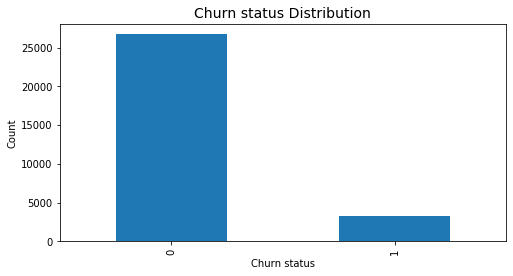

In [49]:
plt.figure(figsize=(8,4))
telecom_churn_df['churn'].value_counts().plot(kind = 'bar')
plt.ylabel('Count')
plt.xlabel('Churn status')
plt.title('Churn status Distribution',fontsize=14)

**Observations**

1. 90% of the consumers are non-churning whereas only 10% of the customers belong to churn class.
2. This is a highly imbalanced dataset.

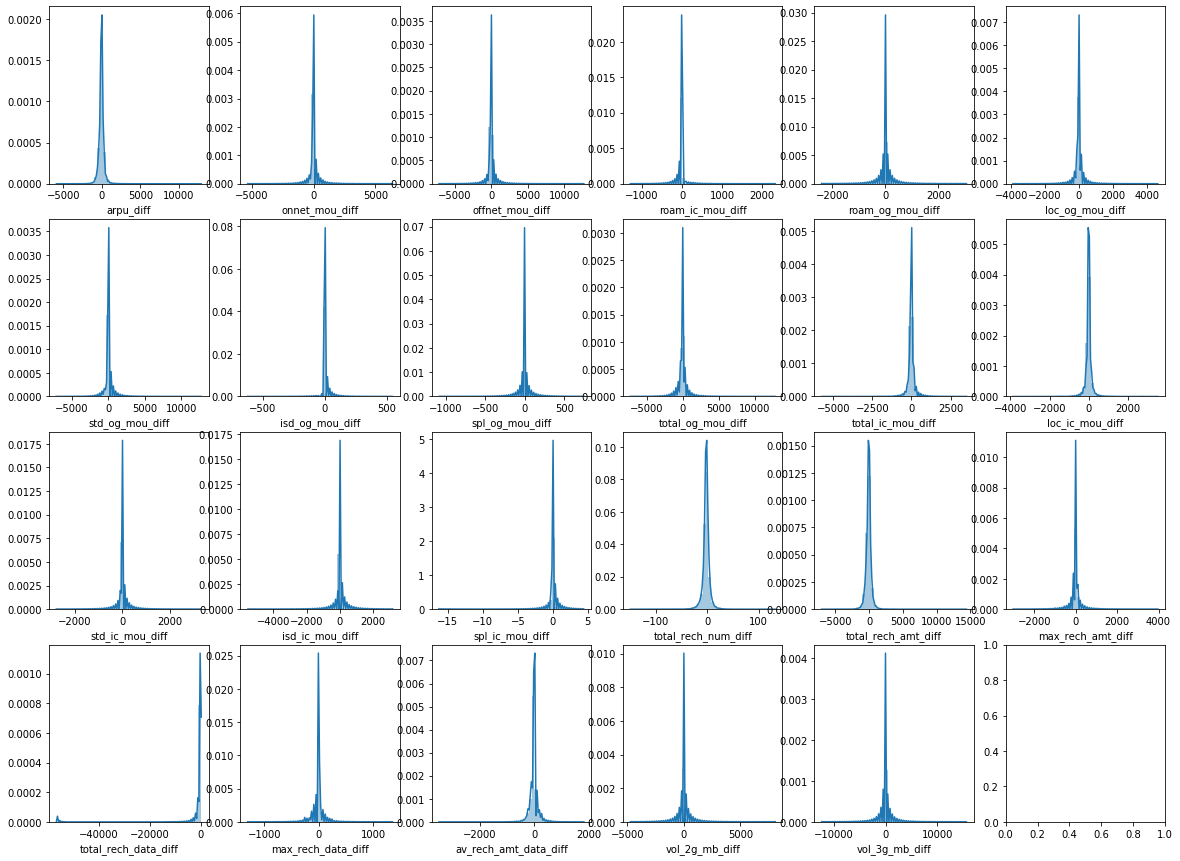

In [50]:
fig, axs = plt.subplots(4, 6, figsize=(20,15))
sns.distplot(telecom_churn_df.arpu_diff, ax=axs[0][0])
sns.distplot(telecom_churn_df.onnet_mou_diff, ax=axs[0][1])
sns.distplot(telecom_churn_df.offnet_mou_diff, ax=axs[0][2])
sns.distplot(telecom_churn_df.roam_ic_mou_diff, ax=axs[0][3])
sns.distplot(telecom_churn_df.roam_og_mou_diff, ax=axs[0][4])
sns.distplot(telecom_churn_df.loc_og_mou_diff, ax=axs[0][5])
sns.distplot(telecom_churn_df.std_og_mou_diff, ax=axs[1][0])
sns.distplot(telecom_churn_df.isd_og_mou_diff, ax=axs[1][1])
sns.distplot(telecom_churn_df.spl_og_mou_diff, ax=axs[1][2])
sns.distplot(telecom_churn_df.total_og_mou_diff, ax=axs[1][3])
sns.distplot(telecom_churn_df.total_ic_mou_diff, ax=axs[1][4])
sns.distplot(telecom_churn_df.loc_ic_mou_diff, ax=axs[1][5])
sns.distplot(telecom_churn_df.std_ic_mou_diff, ax=axs[2][0])
sns.distplot(telecom_churn_df.isd_ic_mou_diff, ax=axs[2][1])
sns.distplot(telecom_churn_df.spl_ic_mou_diff, ax=axs[2][2])
sns.distplot(telecom_churn_df.total_rech_num_diff, ax=axs[2][3])
sns.distplot(telecom_churn_df.total_rech_amt_diff, ax=axs[2][4])
sns.distplot(telecom_churn_df.max_rech_amt_diff, ax=axs[2][5])
sns.distplot(telecom_churn_df.total_rech_data_diff, ax=axs[3][0])
sns.distplot(telecom_churn_df.max_rech_data_diff, ax=axs[3][1])
sns.distplot(telecom_churn_df.av_rech_amt_data_diff, ax=axs[3][2])
sns.distplot(telecom_churn_df.vol_2g_mb_diff, ax=axs[3][3])
sns.distplot(telecom_churn_df.vol_3g_mb_diff, ax=axs[3][4])

### BIVARIATE

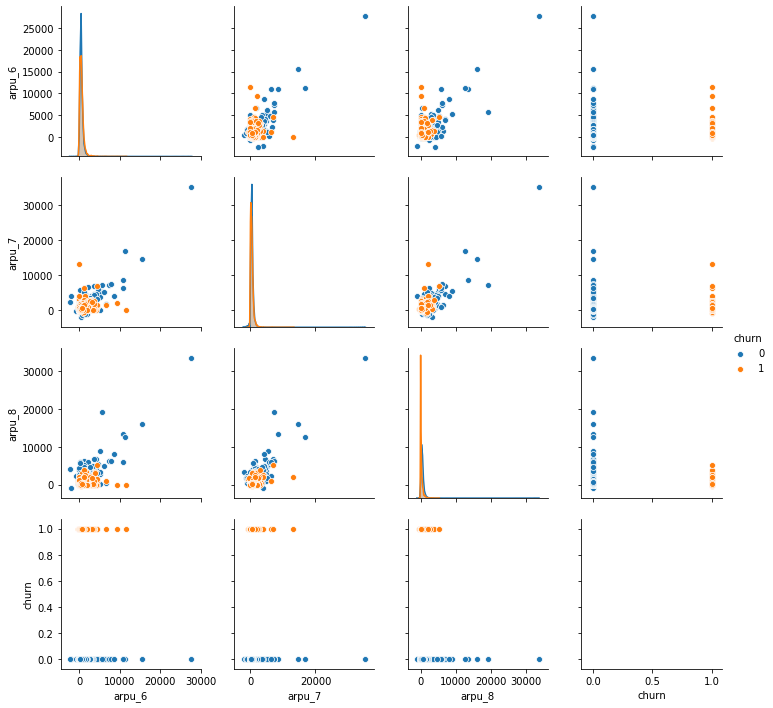

In [51]:
sns.pairplot(data=telecom_churn_df[['arpu_6','arpu_7','arpu_8','churn']],hue='churn')

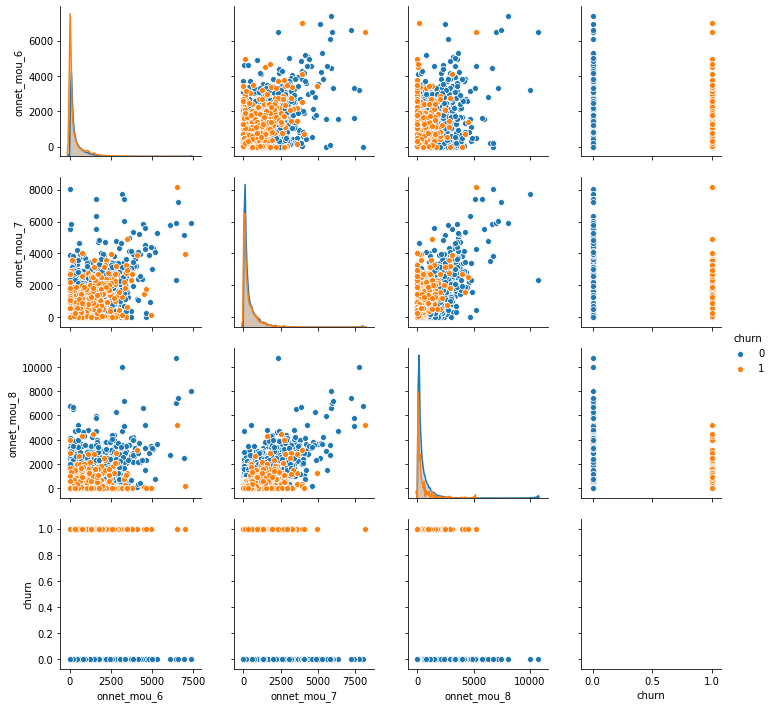

In [52]:
sns.pairplot(data=telecom_churn_df[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn']],hue='churn')

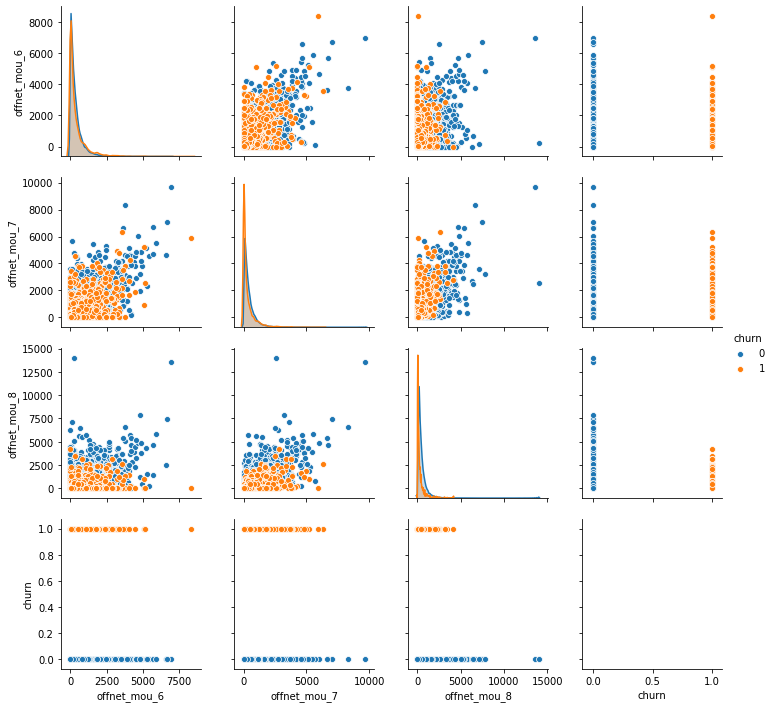

In [53]:
sns.pairplot(data=telecom_churn_df[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn']],hue='churn')

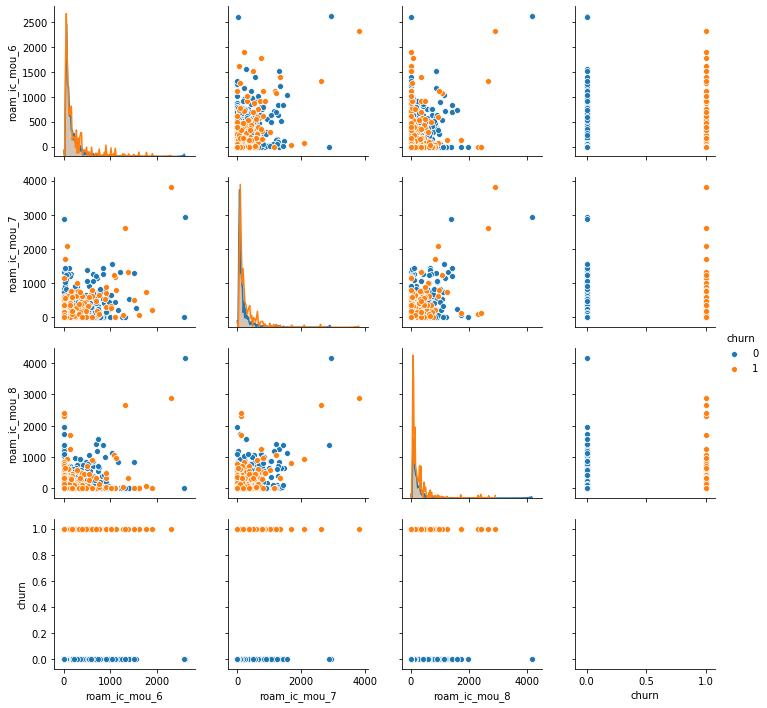

In [54]:
sns.pairplot(data=telecom_churn_df[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn']],hue='churn')

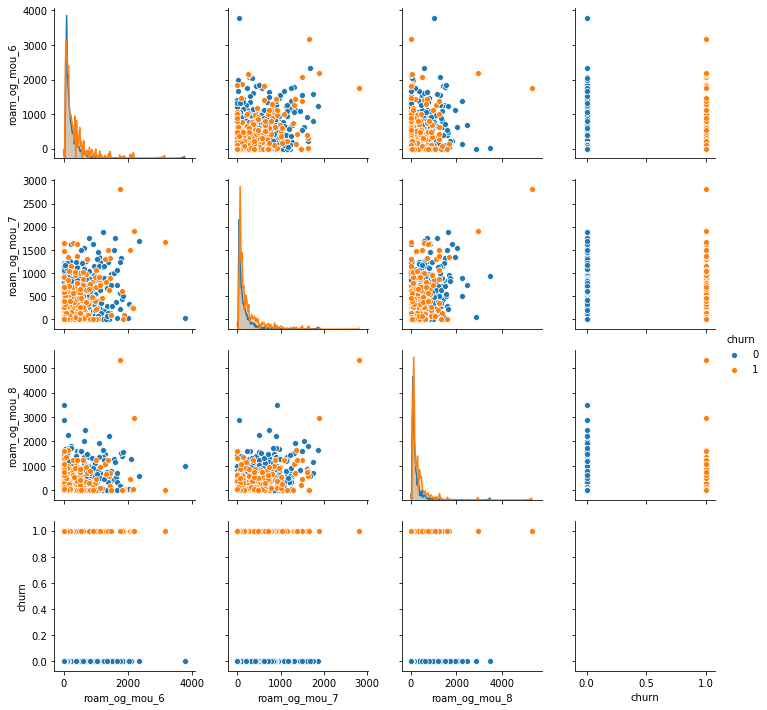

In [55]:
sns.pairplot(data=telecom_churn_df[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','churn']],hue='churn')

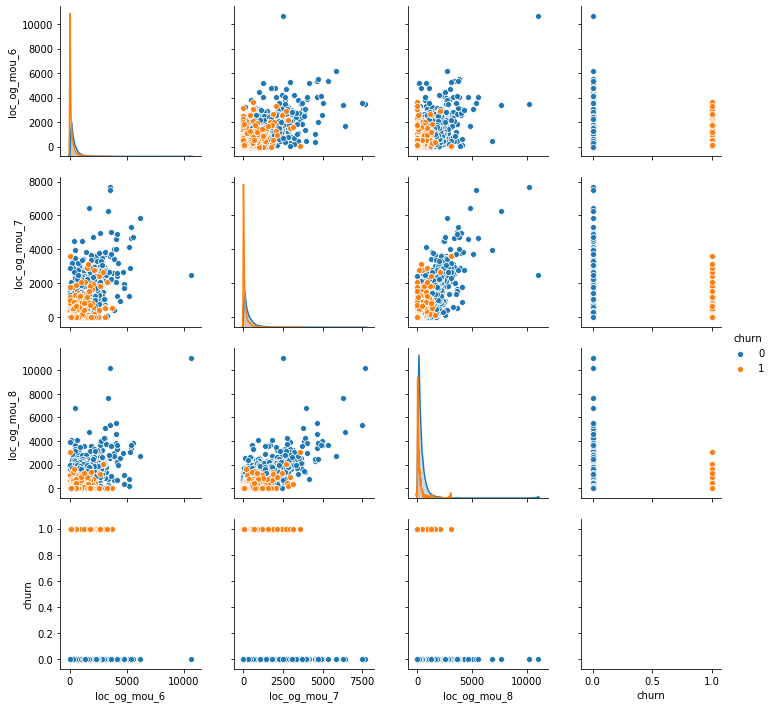

In [56]:
sns.pairplot(data=telecom_churn_df[['loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','churn']],hue='churn')

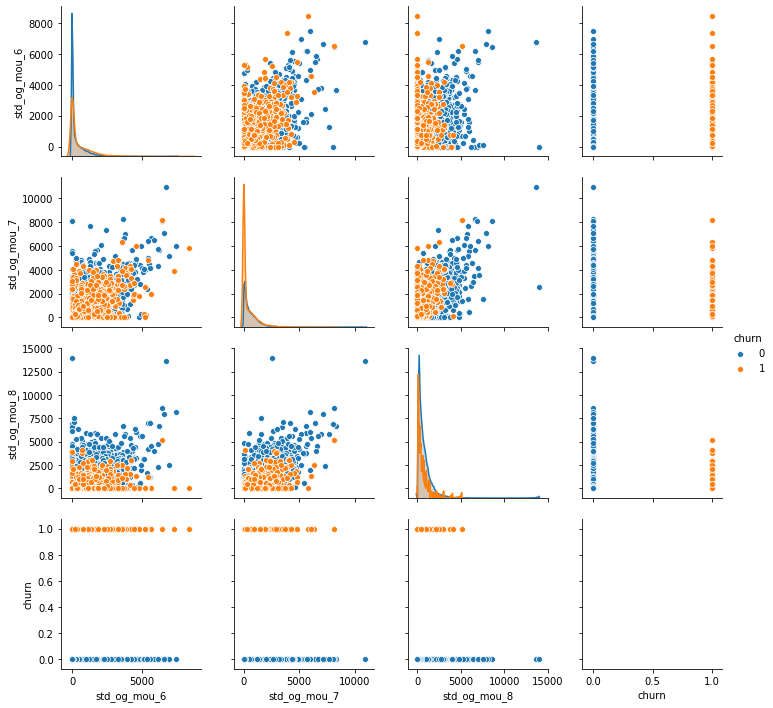

In [57]:
sns.pairplot(data=telecom_churn_df[['std_og_mou_6','std_og_mou_7','std_og_mou_8','churn']],hue='churn')

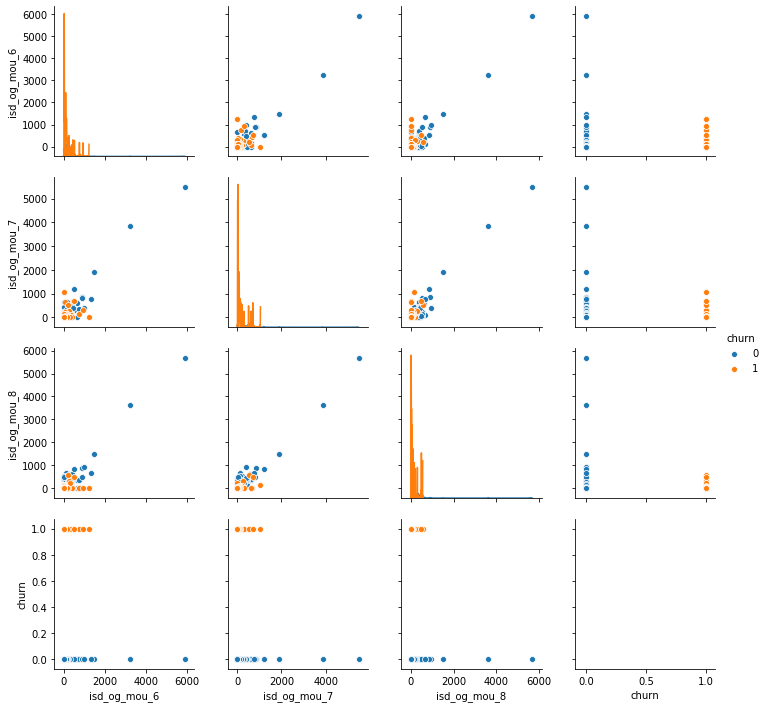

In [58]:
sns.pairplot(data=telecom_churn_df[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churn']],hue='churn')

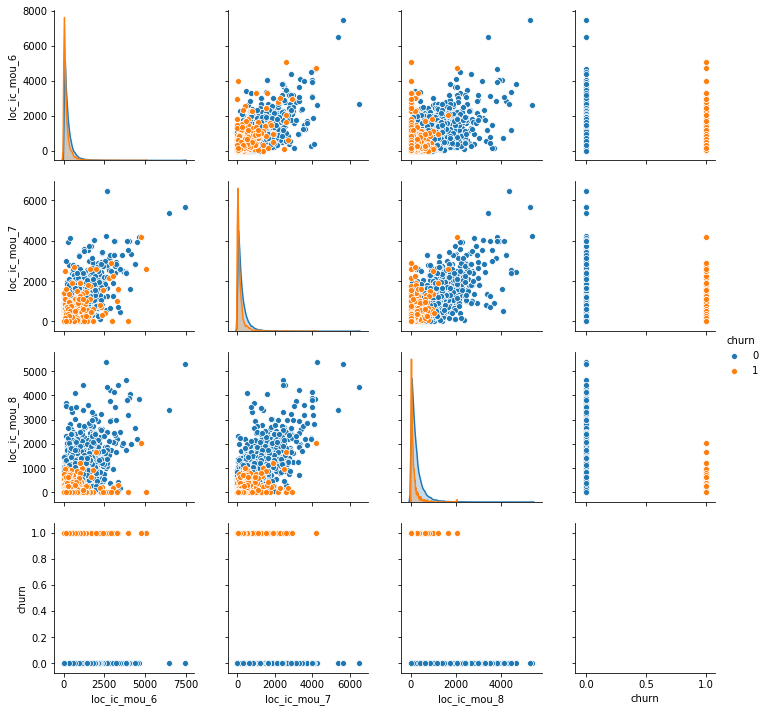

In [59]:
sns.pairplot(data=telecom_churn_df[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn']],hue='churn')

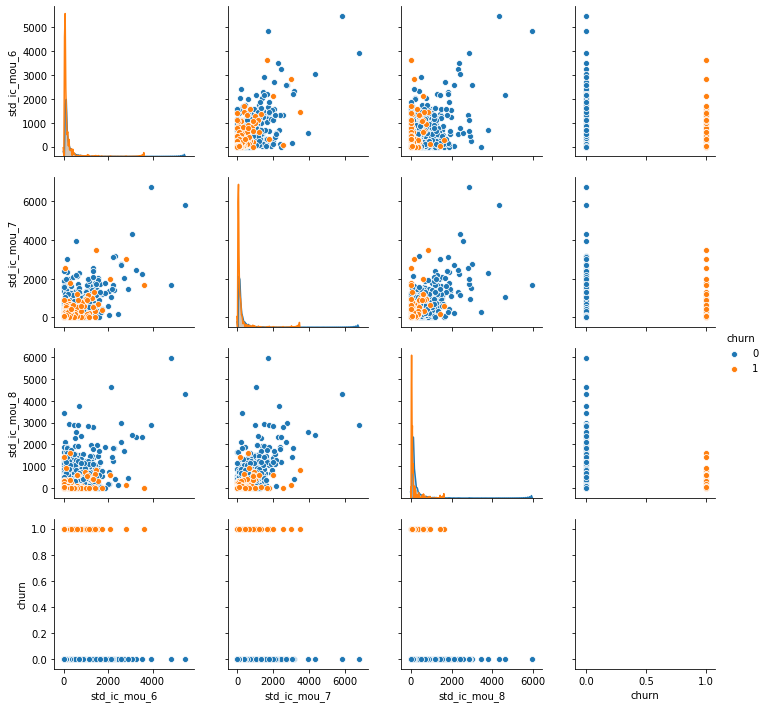

In [60]:
sns.pairplot(data=telecom_churn_df[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn']],hue='churn')

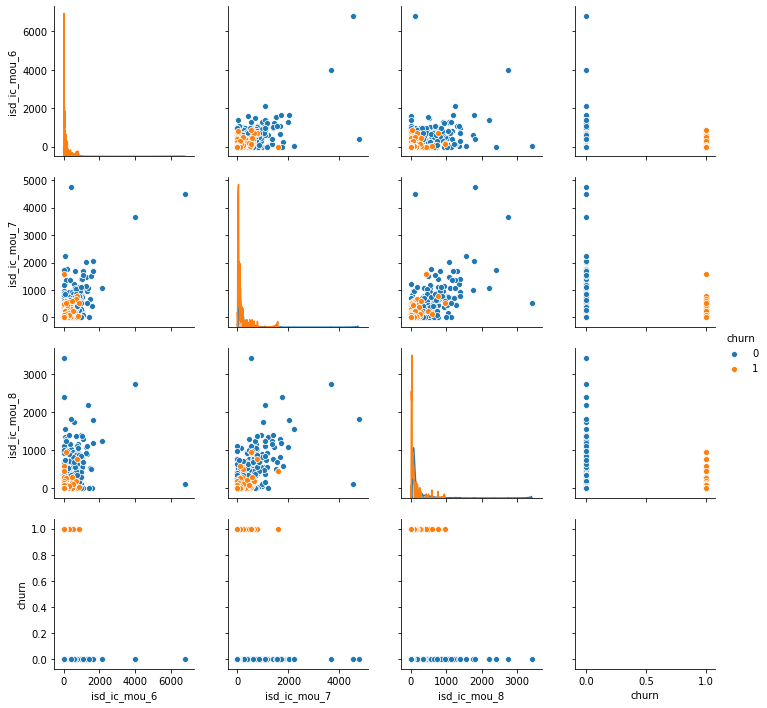

In [61]:
sns.pairplot(data=telecom_churn_df[['isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','churn']],hue='churn')

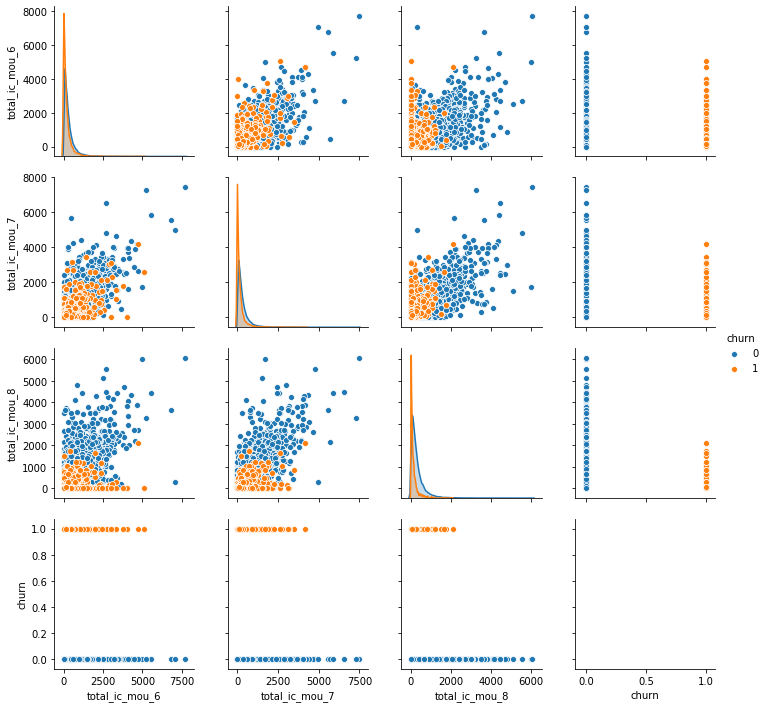

In [62]:
sns.pairplot(data=telecom_churn_df[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn']],hue='churn')

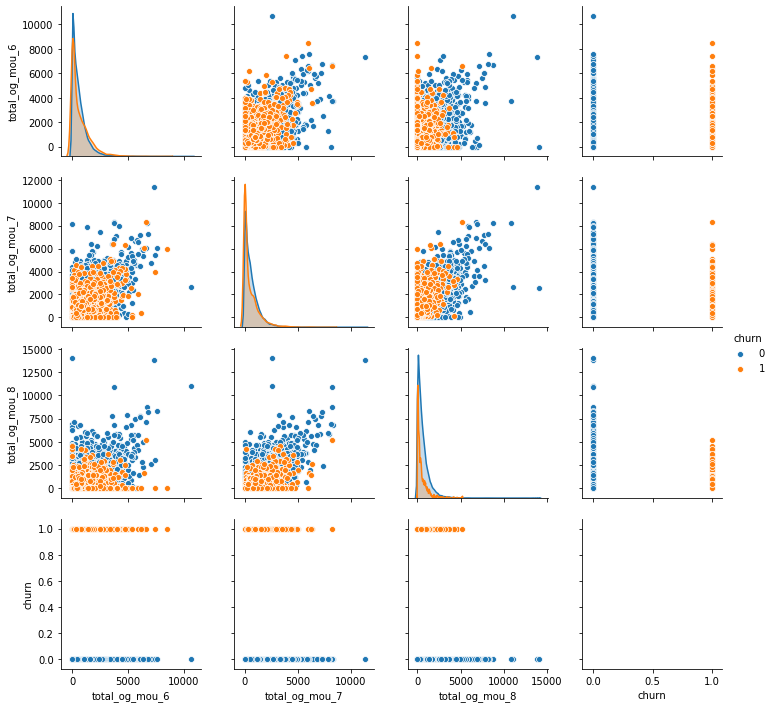

In [63]:
sns.pairplot(data=telecom_churn_df[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']],hue='churn')

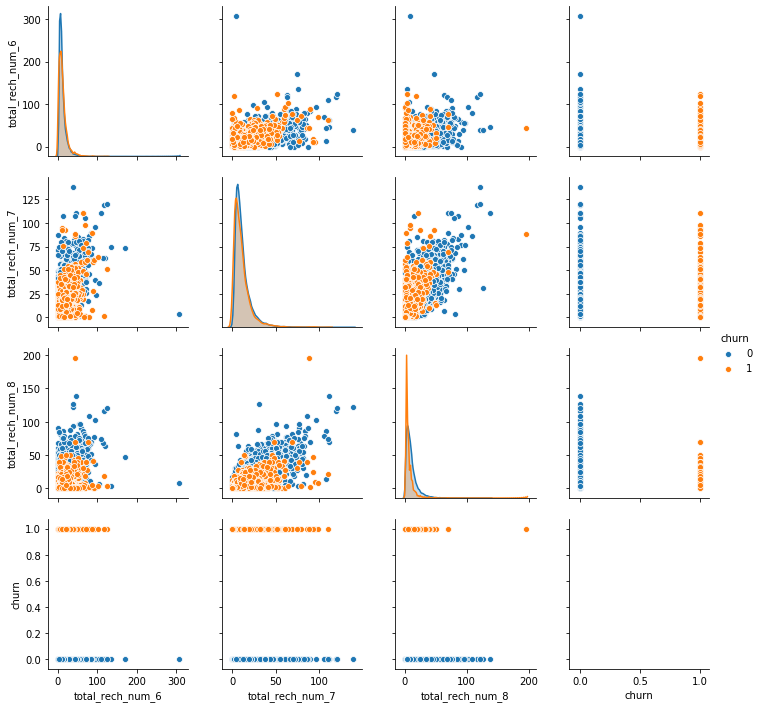

In [64]:
sns.pairplot(data=telecom_churn_df[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churn']],hue='churn')

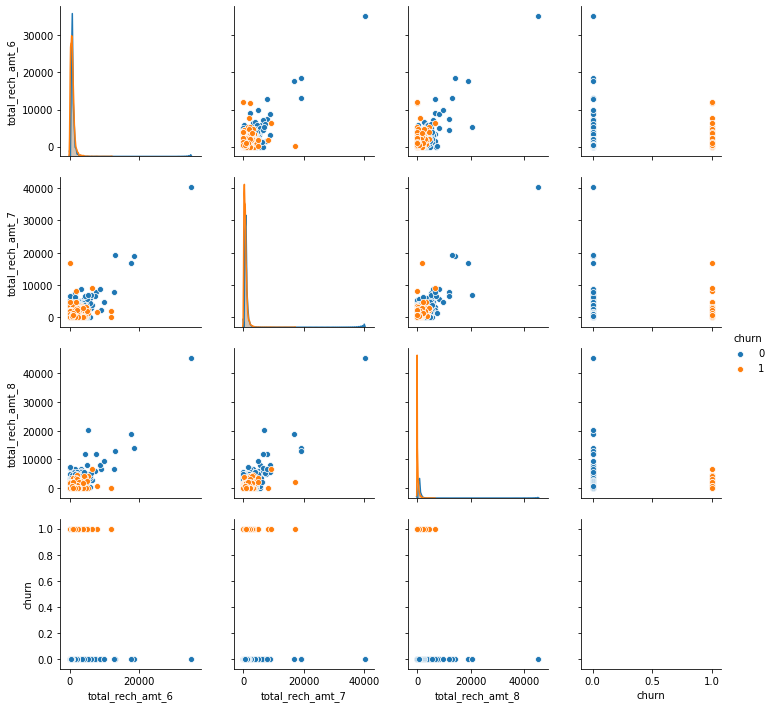

In [65]:
sns.pairplot(data=telecom_churn_df[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churn']],hue='churn')

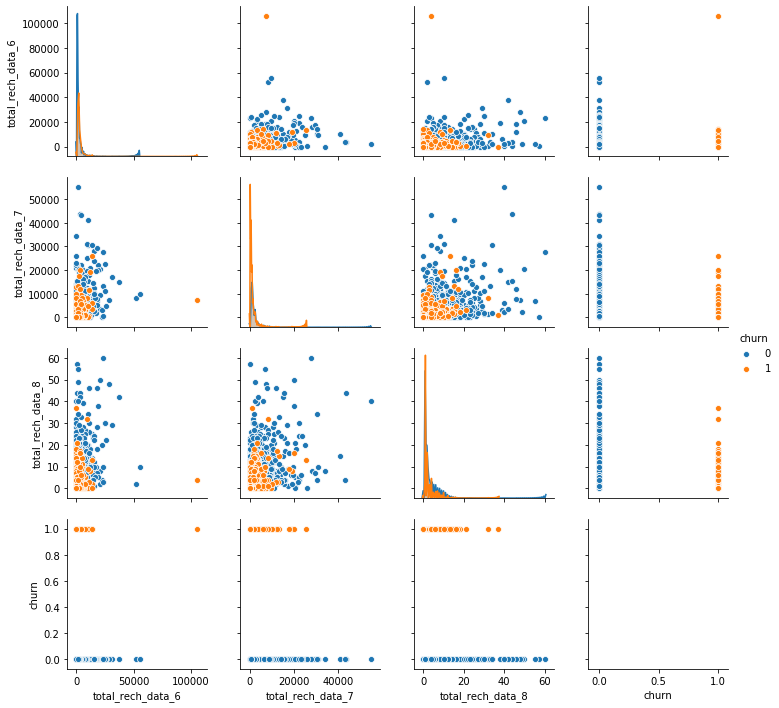

In [66]:
sns.pairplot(data=telecom_churn_df[['total_rech_data_6','total_rech_data_7','total_rech_data_8','churn']],hue='churn')

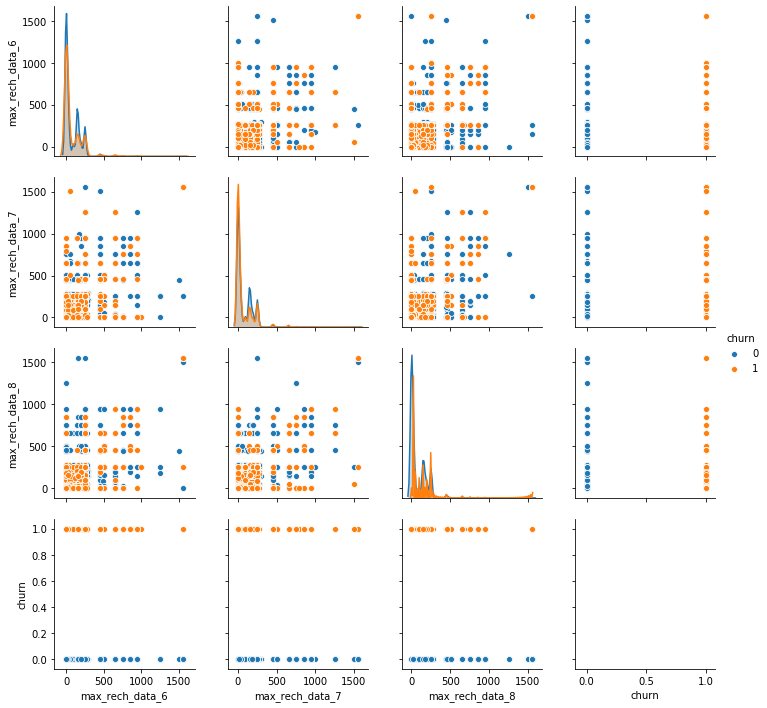

In [67]:
sns.pairplot(data=telecom_churn_df[['max_rech_data_6','max_rech_data_7','max_rech_data_8','churn']],hue='churn')

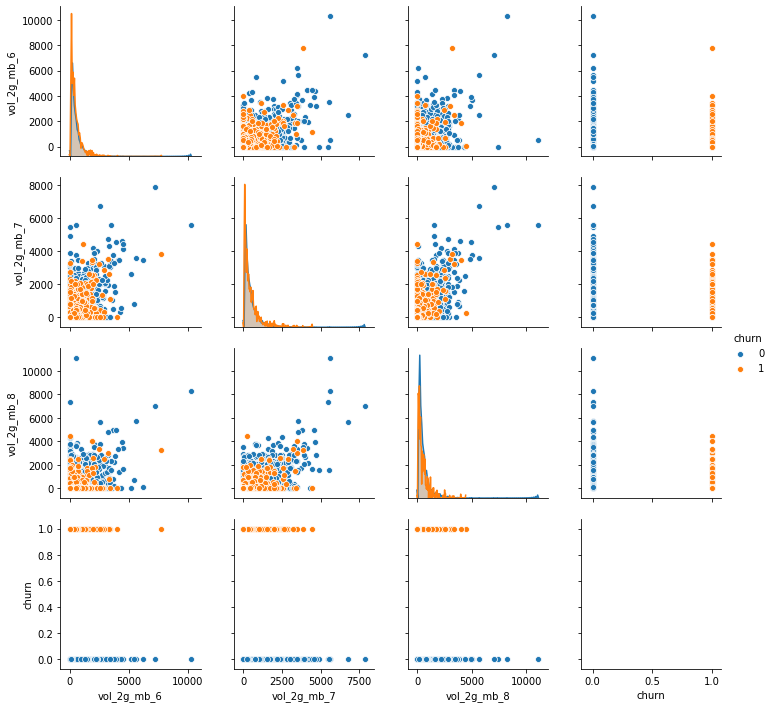

In [68]:
sns.pairplot(data=telecom_churn_df[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','churn']],hue='churn')

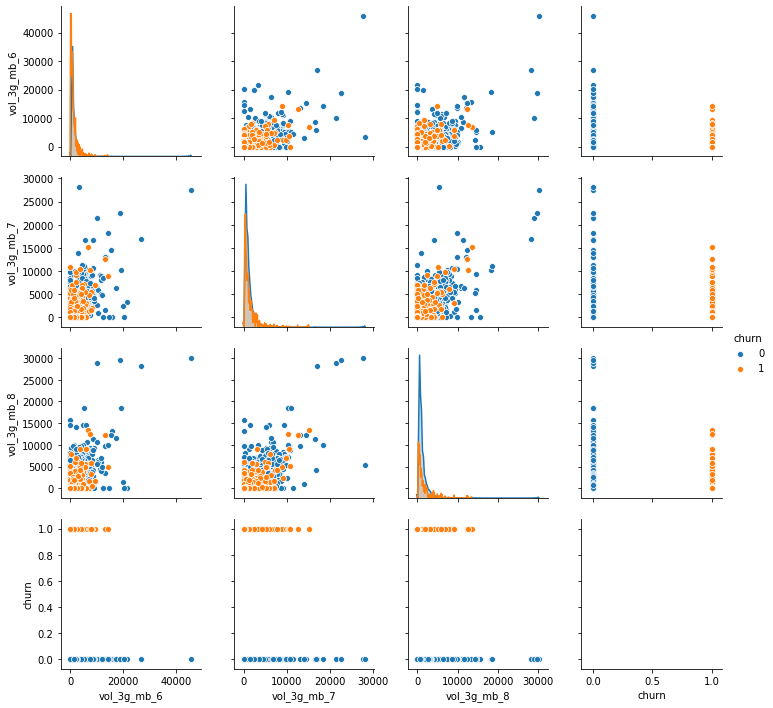

In [69]:
sns.pairplot(data=telecom_churn_df[['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','churn']],hue='churn')

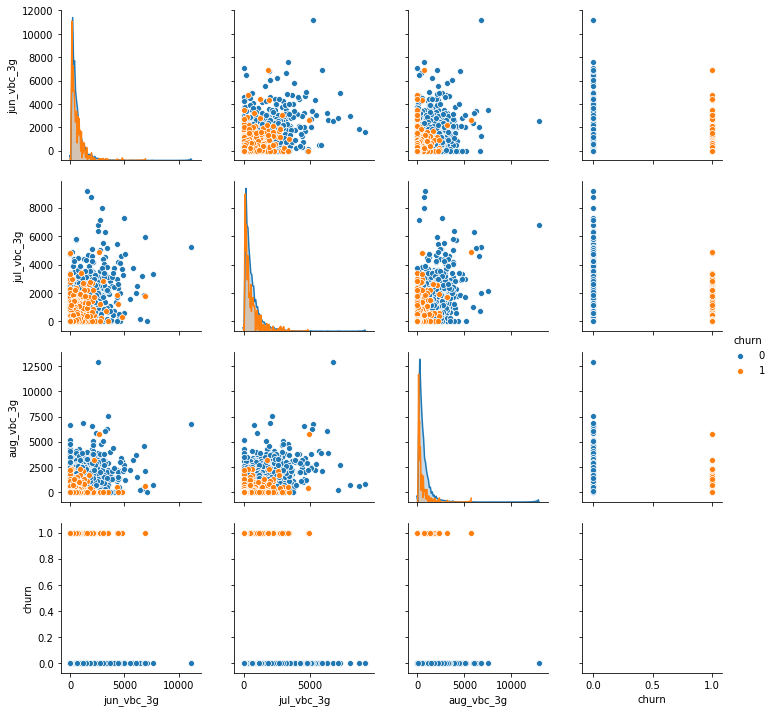

In [70]:
sns.pairplot(data=telecom_churn_df[['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','churn']],hue='churn')

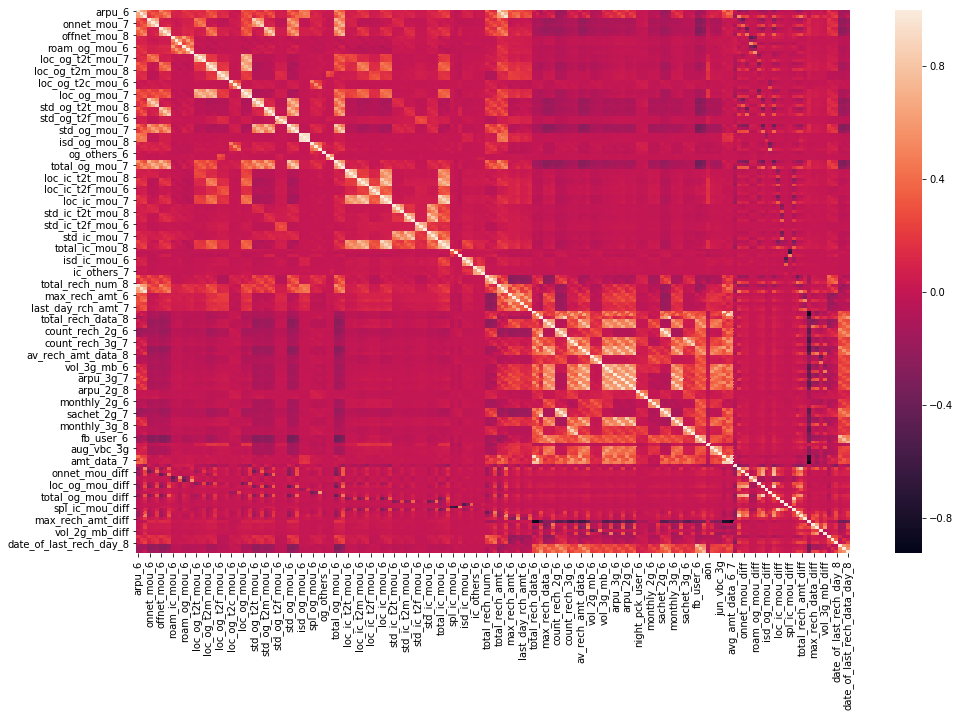

In [71]:
plt.figure(figsize=(16,10))
sns.heatmap(telecom_churn_df.corr())

# Modelling

## Train Test Split

In [72]:
X = telecom_churn_df.drop('churn', axis=1)
y = telecom_churn_df.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4, stratify = y)

In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22464, 189)
(7489, 189)
(22464,)
(7489,)


## PCA

There are **189 features** which can be reduced by applying PCA. Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

In [74]:
# apply pca to train the data
# for pca, all the features needs to be standardized first
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [75]:
pca.fit(X_train)
telecom_pca = pca.fit_transform(X_train)

# extract pca model from pipeline
pca = pca.named_steps['pca']

In [76]:
# look at explainded variance of PCA components
a = pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100).tolist()
b = [(i+1, j) for i, j in enumerate(a)]
b

[(1, 10.5),
 (2, 18.240000000000002),
 (3, 23.71),
 (4, 28.449999999999996),
 (5, 32.57),
 (6, 35.66),
 (7, 38.42),
 (8, 40.87),
 (9, 43.18),
 (10, 45.379999999999995),
 (11, 47.339999999999996),
 (12, 49.16),
 (13, 50.81),
 (14, 52.38),
 (15, 53.94),
 (16, 55.46),
 (17, 56.96),
 (18, 58.39),
 (19, 59.809999999999995),
 (20, 61.11),
 (21, 62.38),
 (22, 63.55),
 (23, 64.62),
 (24, 65.69),
 (25, 66.72),
 (26, 67.74),
 (27, 68.72),
 (28, 69.67),
 (29, 70.61),
 (30, 71.5),
 (31, 72.38),
 (32, 73.25),
 (33, 74.11),
 (34, 74.95),
 (35, 75.76),
 (36, 76.51),
 (37, 77.25999999999999),
 (38, 77.97),
 (39, 78.67),
 (40, 79.34),
 (41, 79.97),
 (42, 80.60000000000001),
 (43, 81.22),
 (44, 81.82000000000001),
 (45, 82.42),
 (46, 83.0),
 (47, 83.55),
 (48, 84.08),
 (49, 84.59),
 (50, 85.07000000000001),
 (51, 85.54),
 (52, 86.0),
 (53, 86.45),
 (54, 86.89),
 (55, 87.32),
 (56, 87.74),
 (57, 88.14999999999999),
 (58, 88.56),
 (59, 88.94999999999999),
 (60, 89.33),
 (61, 89.69),
 (62, 90.03),
 (63, 90

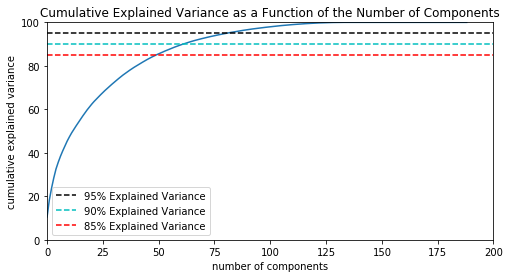

In [77]:
# plotting pca variance 
plt.figure(figsize = (8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
 
plt.xlim(xmax = 200, xmin = 0)
plt.ylim(ymax = 100, ymin = 0)
 
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

**Observations**

1. 95% variance can be explained by 82 components.
2. 90% variance can be explained by 62 features.
3. 85% variance can be explained by 50 components.

### PCA & Logistic Regression

In [78]:
# create pipeline 
PCA_VARS = 62 #(90% variance)
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [79]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8147257834757835

In [80]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5330 1345]
 [ 159  655]]
Sensitivity: 	0.8
Specificity: 	0.8
AUC:    	 0.88


**Observations**

1. Sensitivity (churned consumers correctly identified as churn) comes out to be 0.81 which is pretty good.
2. Specificity (non-churn consumers correctly identified as non-churn) is around 0.8 which is also good.

## Hyperparameter tuning - PCA & Logistic Regression

Let us work on getting the best parameters 

In [81]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
# about 90% customers (class 0) belong to churn and 10% customers belong to non-churn category(class = 1) as observed during EDA 
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [50, 62, 82], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [82]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.4min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRe...
                                                           multi_class='warn',
       

In [83]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.90,0.31,0.31,0.14,0.10,l1,50,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.89,0.88,0.90,0.86,0.89,0.88,0.01,47
1,5.35,0.11,0.39,0.11,0.10,l1,62,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.89,0.89,0.89,0.87,0.89,0.89,0.01,17
2,6.45,0.25,0.29,0.06,0.10,l1,82,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.90,0.89,0.90,0.87,0.89,0.89,0.01,1
3,5.02,0.62,0.35,0.19,0.10,l2,50,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.89,0.88,0.90,0.87,0.89,0.88,0.01,48
4,5.29,0.46,0.25,0.05,0.10,l2,62,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.89,0.88,0.89,0.87,0.89,0.89,0.01,27
5,7.71,0.45,0.47,0.04,0.10,l2,82,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.90,0.89,0.90,0.87,0.89,0.89,0.01,4
6,5.94,0.75,0.44,0.10,0.50,l1,50,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.89,0.88,0.90,0.87,0.89,0.88,0.01,38
7,6.86,0.53,0.45,0.13,0.50,l1,62,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.89,0.88,0.89,0.87,0.89,0.89,0.01,20
8,9.78,0.67,0.55,0.14,0.50,l1,82,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.90,0.88,0.90,0.87,0.89,0.89,0.01,2
9,7.82,0.68,0.39,0.09,0.50,l2,50,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.89,0.88,0.90,0.87,0.89,0.88,0.01,42


In [84]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8873405335470255
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l1', 'pca__n_components': 82}


In [85]:
# predict churn on test data
y_pred = model.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[5243 1432]
 [ 137  677]]
Sensitivity: 	0.83
Specificity: 	0.79
AUC:    	 0.88


## Random Forest

In [86]:
# random forest
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [87]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   19.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                

In [88]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8991450459340274
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [89]:
# predict churn on test data. 
y_pred = model.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specifici
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6537  138]
 [ 483  331]]
Sensitivity: 	0.41
Specificity: 	0.98
AUC:    	 0.89


**Observations**

1. The specificity has increased to 98% i.e. the non-churning customers have been correctly identified as non-churn.
2. The **sensitivity** has decreased badly to 44% i.e. the churn customers are not being correctly classified.
3. Due to poor sensitivity, logsitics regression model is better than random forest model. 

In our case, poor specificity can be tolerated but senstivity cannot be tolerated.

# Important Features Selection 

In [90]:
# number of variables to consider to split each node
max_features = int(round(np.sqrt(X_train.shape[1])))    
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

14


In [91]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   12.0s finished


RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
                       criterion='gini', max_depth=None, max_features=14,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=4, verbose=1, warm_start=False)

In [92]:
# OOB score
rf_model.oob_score_

0.9256588319088319

In [93]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[6561  114]
 [ 480  334]]
Sensitivity: 	0.41
Specificity: 	0.98
ROC:    	 0.92


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [94]:
# predictors
features = telecom_churn_df.drop('churn', axis=1).columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,5.31
1,loc_ic_mou_8,4.83
2,loc_og_t2m_mou_8,3.96
3,loc_og_mou_8,3.51
4,total_og_mou_8,3.17
5,loc_ic_t2m_mou_8,2.88
6,arpu_8,2.63
7,loc_og_t2t_mou_8,2.40
8,date_of_last_rech_day_8,2.12
9,total_rech_amt_8,2.11


In [95]:
top_features = feature_importance[feature_importance.importance_percentage > 1]['variables']
top_features

0              total_ic_mou_8
1                loc_ic_mou_8
2            loc_og_t2m_mou_8
3                loc_og_mou_8
4              total_og_mou_8
5            loc_ic_t2m_mou_8
6                      arpu_8
7            loc_og_t2t_mou_8
8     date_of_last_rech_day_8
9            total_rech_amt_8
10        total_rech_amt_diff
11               offnet_mou_8
12                  arpu_diff
13                onnet_mou_8
14           loc_ic_t2t_mou_8
15         last_day_rch_amt_8
16              roam_og_mou_8
17             max_rech_amt_8
18          total_ic_mou_diff
19          total_og_mou_diff
20           loc_og_t2f_mou_8
21            loc_ic_mou_diff
22              roam_ic_mou_8
Name: variables, dtype: object

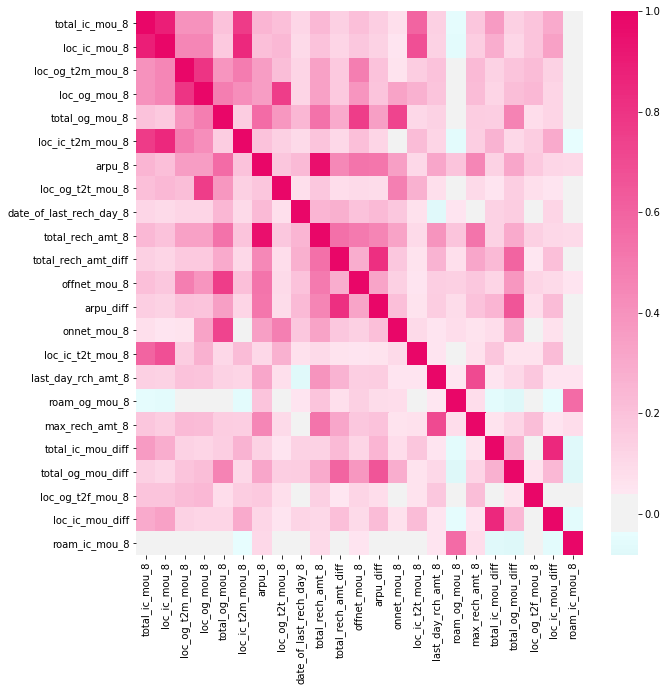

In [96]:
# plot feature correlation
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)

In [97]:
pd.options.display.max_rows = 100
corr= X_train[top_features].corr()
top_features_corr = corr.stack().reset_index().sort_values(by = 0, ascending = False)
top_features_corr[((top_features_corr[0] < 1) & (top_features_corr[0] >= 0.4)) | ((top_features_corr[0] <= -0.4) & (top_features_corr[0] > -1))]

,level_0,level_1,0
147,arpu_8,total_rech_amt_8,0.95
213,total_rech_amt_8,arpu_8,0.95
23,loc_ic_mou_8,total_ic_mou_8,0.89
1,total_ic_mou_8,loc_ic_mou_8,0.89
28,loc_ic_mou_8,loc_ic_t2m_mou_8,0.85
116,loc_ic_t2m_mou_8,loc_ic_mou_8,0.85
435,total_ic_mou_diff,loc_ic_mou_diff,0.85
501,loc_ic_mou_diff,total_ic_mou_diff,0.85
242,total_rech_amt_diff,arpu_diff,0.82
286,arpu_diff,total_rech_amt_diff,0.82


In [98]:
# taking the top features on the basis of importance, domain knowledge and correlation.
top_features = ['arpu_8','total_ic_mou_8','total_rech_amt_8','total_og_mou_8','loc_ic_mou_8',
                'roam_og_mou_8','roam_ic_mou_8','offnet_mou_8','onnet_mou_8','std_og_mou_8',
                'std_ic_mou_8']

X_train = X_train[top_features]
X_test = X_test[top_features]

In [99]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [100]:
# fit model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   24.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ra

In [101]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.862269984916443
Best hyperparameters:  {'logistic__C': 3, 'logistic__penalty': 'l2'}


In [102]:
# predict churn on test data
y_pred = model.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4580 2095]
 [ 150  664]]
Sensitivity: 	0.82
Specificity: 	0.69
ROC:    	 0.84


### Calculate intercept and the coefficients from the logistic model

In [103]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [104]:
# intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [105]:
# coefficients
coefficients = logistic_model.coef_.reshape((11, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [106]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

,intercept,arpu_8,total_ic_mou_8,total_rech_amt_8,total_og_mou_8,loc_ic_mou_8,roam_og_mou_8,roam_ic_mou_8,offnet_mou_8,onnet_mou_8,std_og_mou_8,std_ic_mou_8
0,-1.08,-0.19,-0.08,-0.93,0.14,-1.48,0.50,0.06,-0.69,-0.65,0.77,-0.32


# Conclusion

1. Telecom company needs to take care of roaming plans as customers with high outgoing and incoming minutes roaming usage is churning the most. 
2. Telecom company needs to provide some offers/packages on STD plans as std call consumers are also churning.